# Linear

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('linear_data.csv') 
df.head() 

,x,y
0,0.00000,4.447692
1,0.02004,5.024612
2,0.04008,5.869593
3,0.06012,4.722490
4,0.08016,4.877101


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   y       500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [4]:
x=df['x']
x.head()

0    0.00000
1    0.02004
2    0.04008
3    0.06012
4    0.08016
Name: x, dtype: float64

In [5]:
y=df['y']
y.head()

0    4.447692
1    5.024612
2    5.869593
3    4.722490
4    4.877101
Name: y, dtype: float64

<Figure size 700x900 with 0 Axes>

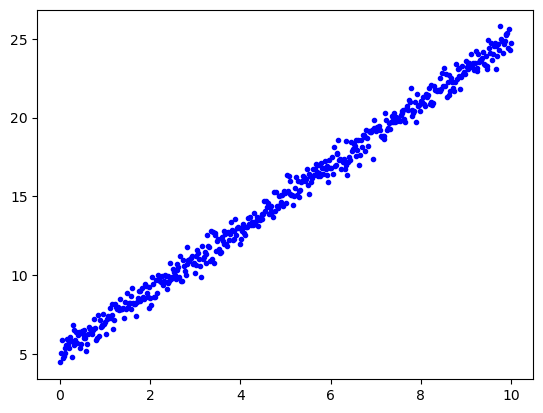

<Figure size 700x900 with 0 Axes>

In [6]:
plt.scatter(df.x,df.y,color='blue',marker='.')
plt.figure(figsize=(7,9))

In [7]:
df.corr()

,x,y
x,1.00000,0.99644
y,0.99644,1.00000


# Non-Linear

In [8]:
df2=pd.read_csv('nonlinear_data.csv') 
df2.head()

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


In [9]:
x1=df2['x']
x1.head()

0    0.00000
1    0.02004
2    0.04008
3    0.06012
4    0.08016
Name: x, dtype: float64

In [10]:
y1=df2['y']
y1.head()

0   -0.155043
1    0.081809
2   -0.014298
3    0.143978
4    0.019553
Name: y, dtype: float64

<Figure size 700x900 with 0 Axes>

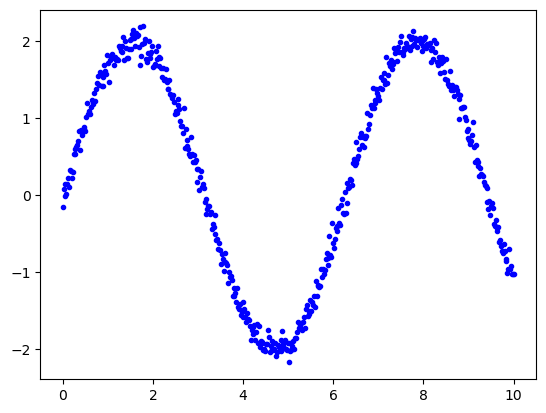

<Figure size 700x900 with 0 Axes>

In [11]:
plt.scatter(df2.x,df2.y,color='blue',marker='.')
plt.figure(figsize=(7,9))

In [12]:
df2.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


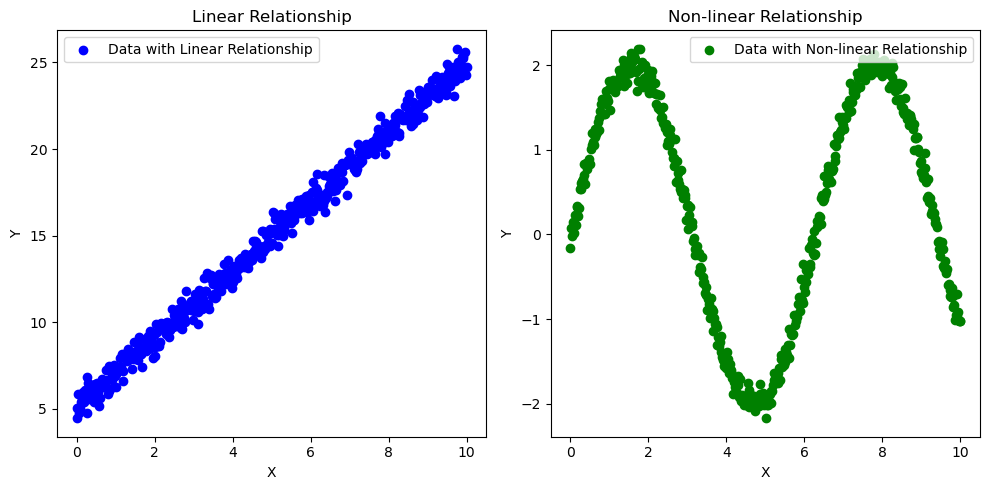

In [13]:
#linear
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

plt.scatter(df.x, df.y, color='blue', label='Data with Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Relationship')
plt.legend()

#non-linear
plt.subplot(1, 2, 2)
plt.scatter(df2.x, df2.y, color='green', label='Data with Non-linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-linear Relationship')
plt.legend()

plt.tight_layout() #adjusts the subplots to fit into the figure area properly
plt.show()

# Using Linear Regression

PART-01

In [14]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()

In [15]:
reg1.fit(df[['x']] , df['y']) #training

#or, you can write: reg1.fit(df[['x']] , df[['y']]) 
#or, reg1.fit(df[['x']] , df.y) 

LinearRegression()

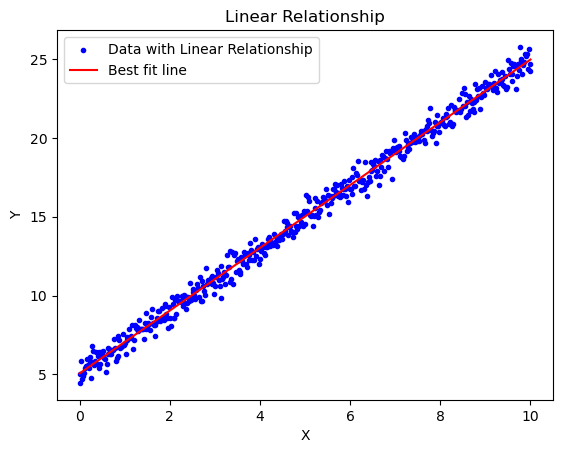

In [16]:
plt.scatter(df[['x']], df.y, color='blue',marker='.' ,label='Data with Linear Relationship')
plt.plot(df[['x']], reg1.predict(df[['x']]), color='red', label='Best fit line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Relationship')
plt.legend()

In [17]:
reg1.score(df[['x']] , df[['y']]) # training score


0.9928923730526016

In [18]:
reg1.score(df[['x']],df.y)

0.9928923730526016

In [19]:
reg1.score(df[['x']],y)

0.9928923730526016

Part-02

In [20]:
reg2 = LinearRegression()
reg2.fit(df2[['x']], df2['y'])

LinearRegression()

In [21]:
reg2.score(df2[['x']],df2['y'])

0.004321199719043656

In [22]:
reg2.score(df2[['x']],df2['y'])*100

0.4321199719043656

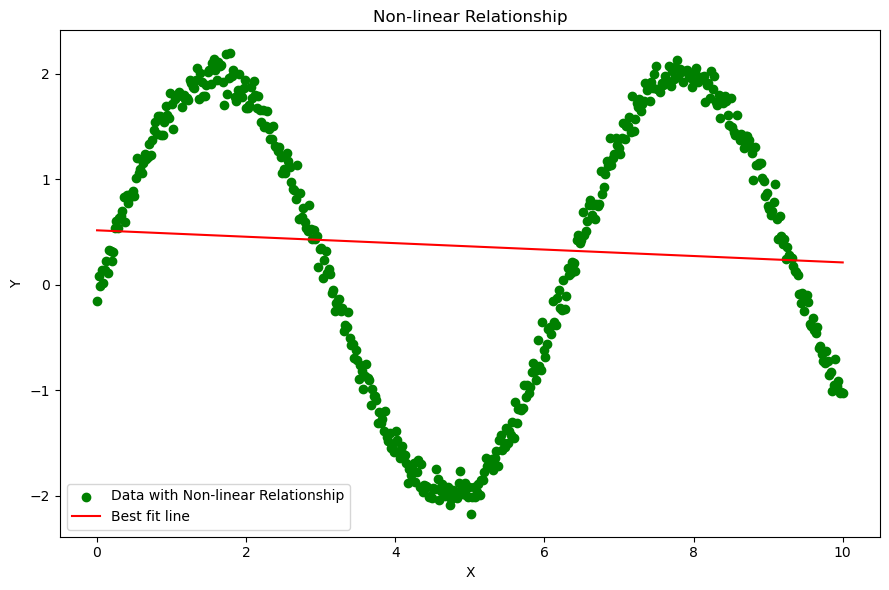

In [23]:
plt.figure(figsize=(9,6))

plt.scatter(df2.x, df2.y, color='green', label='Data with Non-linear Relationship')
plt.plot(df2[['x']], reg2.predict(df2[['x']]), color='red', label='Best fit line')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-linear Relationship')
plt.legend()

plt.tight_layout()
plt.show()

Now we will increase accuracy for non-linear using polynomial 

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
poly = PolynomialFeatures(degree=7) # polynomial regression with degree n
X_poly = poly.fit_transform(df2[['x']])

In [26]:
X_poly.shape

(500, 8)

In [27]:
df.x.head()

0    0.00000
1    0.02004
2    0.04008
3    0.06012
4    0.08016
Name: x, dtype: float64

In [28]:
pd.DataFrame(X_poly)

,0,1,2,3,4,5,6,7
0,1.0,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1.0,0.02004,0.000402,0.000008,1.612864e-07,3.232193e-09,6.477340e-11,1.298064e-12
2,1.0,0.04008,0.001606,0.000064,2.580583e-06,1.034302e-07,4.145498e-09,1.661522e-10
3,1.0,0.06012,0.003614,0.000217,1.306420e-05,7.854229e-07,4.721981e-08,2.838866e-09
4,1.0,0.08016,0.006426,0.000515,4.128932e-05,3.309766e-06,2.653119e-07,2.126748e-08
...,...,...,...,...,...,...,...,...
495,1.0,9.91984,98.403219,976.144159,9.683194e+03,9.605573e+04,9.528574e+05,9.452193e+06
496,1.0,9.93988,98.801210,982.072144,9.761679e+03,9.702992e+04,9.644657e+05,9.586673e+06
497,1.0,9.95992,99.200003,988.024080,9.840641e+03,9.801199e+04,9.761916e+05,9.722790e+06
498,1.0,9.97996,99.599600,994.000016,9.920080e+03,9.900200e+04,9.880360e+05,9.860560e+06


In [29]:
reg_poly = LinearRegression()

In [30]:
reg_poly.fit(X_poly, df2.y) # all data

LinearRegression()

In [31]:
reg_poly.score(X_poly, df2.y)

0.9936598606222112

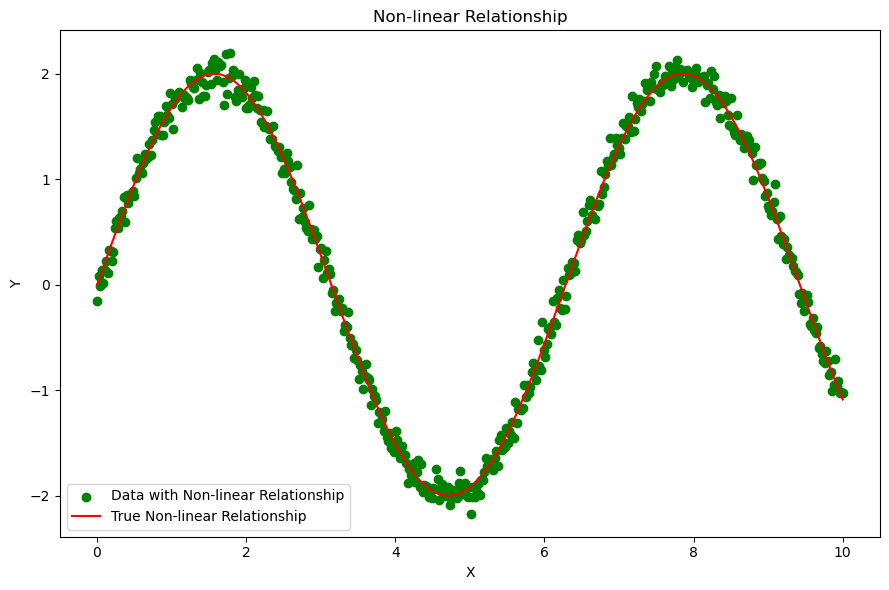

In [32]:
plt.figure(figsize=(9,6))

plt.scatter(df2.x, df2.y, color='green', label='Data with Non-linear Relationship')
plt.plot(df2.x, 2 * np.sin(df2.x), color='red', label='True Non-linear Relationship')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-linear Relationship')

plt.legend()
plt.tight_layout()
plt.show()

# Testing Overfit or Bestfit

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
xtrain, xtest, ytrain, ytest = train_test_split(X_poly, df2.y, test_size=0.25, random_state=42)

In [35]:
xtrain.shape

(375, 8)

In [36]:
pd.DataFrame(xtrain)

,0,1,2,3,4,5,6,7
0,1.0,4.549098,20.694294,94.140377,428.253821,1948.168683,8862.410644,4.031598e+04
1,1.0,8.356713,69.834659,583.588235,4876.879639,40754.685563,340575.228054,2.846090e+06
2,1.0,4.068136,16.549733,67.326568,273.893654,1114.236707,4532.866762,1.844032e+04
3,1.0,2.525050,6.375878,16.099411,40.651820,102.647883,259.191048,6.544704e+02
4,1.0,6.593186,43.470107,286.606514,1889.650163,12458.815705,82143.293924,5.415860e+05
...,...,...,...,...,...,...,...,...
370,1.0,2.124248,4.512432,9.585526,20.362040,43.254032,91.882313,1.951809e+02
371,1.0,5.410822,29.276991,158.412576,857.142194,4637.843532,25094.544162,1.357821e+05
372,1.0,6.973948,48.635949,339.184576,2365.455560,16496.563824,115046.176565,8.023260e+05
373,1.0,8.717435,75.993671,662.469875,5775.037988,50343.517528,438866.335164,3.825789e+06


In [37]:
reg_poly.fit(xtrain, ytrain)

LinearRegression()

In [38]:
reg_poly.score(xtrain, ytrain) # train data -> training accuracy

0.9939630254401265

In [39]:
reg_poly.score(xtest, ytest) # unseen/new data -> testing accuracy

0.9923172867605041